In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from scipy.misc import imread

from keras.utils import to_categorical

/home/renjie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [72]:
data_path = os.path.join(os.getcwd(), '..','data', 'Augments_train')
Original_image_path = os.path.join(data_path, 'Original')
# Original_image_names = os.listdir(Original_image_path)
# Original_image_names.sort(key = lambda x:int(x.split('_')[2].split('.')[0]))

SegMask_path = os.path.join(data_path, 'SegMask_Wound_Bg')
# SegMask_names = os.listdir(SegMask_path)
# SegMask_names.sort(key = lambda x:int(x.split('_')[4].split('.')[0]))

In [ ]:
# Testing
list(map(lambda x: x.split('_')[4], SegMask_names)) == list(map(lambda x: x.split('_')[2], Original_image_names)) 

In [ ]:
SegMask_Raw_path = os.path.join(data_path, 'SegMask_Wound_Bg_Raw')
# SegMask_Raw_names = os.listdir(SegMask_Raw_path)[:500]
SegMask_Raw_names = os.listdir(SegMask_Raw_path)[500:]

In [ ]:
SegMasks_Raw = np.array([imread(os.path.join(SegMask_Raw_path, x)) for x in SegMask_Raw_names])

In [ ]:
SegMask_Raw_names[0]

In [ ]:
SegMasks_Raw.shape

In [ ]:
SegMasks_Raw = to_categorical(SegMasks_Raw, 2)

In [ ]:
SegMasks_Raw.shape

In [ ]:
SegMasks_Bg = SegMasks_Raw[:,:,:,0]
SegMasks_Wound = SegMasks_Raw[:,:,:,1]

In [ ]:
SegMasks_Bg.shape, SegMasks_Wound.shape

In [ ]:
num = 1

In [ ]:
print("Seg mask number: ", num)
print("Seg mask name: ", SegMask_Raw_names[num])
print("shapes: {} {}".format(SegMasks_Bg[num].shape, SegMasks_Wound[num].shape))
plt.imshow(SegMasks_Bg[num])

In [ ]:
plt.imshow(SegMasks_Wound[num])

In [ ]:
SegMask_BG_path = os.path.join(SegMask_Raw_path, '..','SegMask_Wound_Bg', 'BG')
SegMask_Wound_path = os.path.join(SegMask_Raw_path, '..','SegMask_Wound_Bg', 'Wound')

In [ ]:
test = imread(os.path.join(SegMask_Wound_path, os.listdir(SegMask_Wound_path)[0]))
test.shape
plt.imshow(test)

In [ ]:
test = imread(os.path.join(SegMask_BG_path, os.listdir(SegMask_BG_path)[0]))
test.shape
plt.imshow(test)

In [ ]:
plt.imshow(test)

In [ ]:
# spliting into different directories
for i in range(len(SegMask_Raw_names)):
    name = SegMask_Raw_names[i]
#     old_name = os.path.join(SegMask_Raw_path, name)
    new_name_BG = os.path.join(SegMask_Raw_path, '..','SegMask_Wound_Bg', 'BG', name)
    new_name_Wound = os.path.join(SegMask_Raw_path, '..', 'SegMask_Wound_Bg', 'Wound', name)
#     print(new_name_BG)
    cv2.imwrite(new_name_BG, SegMasks_Bg[i])
    cv2.imwrite(new_name_Wound, SegMasks_Wound[i])
# os.rename()

# Image Data Generator

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [73]:
image_datagen = ImageDataGenerator()
mask_datagen = ImageDataGenerator(preprocessing_function= to_categorical)

In [74]:
print(Original_image_path)
# print(Original_image_names[0])

/home/renjie/Documents/GitHub/CascadedFCN/notebook/../data/Augments_train/Original


In [75]:
seed = 1

In [77]:
image_generator = image_datagen.flow_from_directory(Original_image_path, 
                                                    (480, 640),
                                                    class_mode= None,
                                                   seed = seed)
mask_generator = mask_datagen.flow_from_directory(SegMask_path,
                                                 (480,640),
                                                 color_mode = 'grayscale',
                                                 class_mode=None,
                                                 seed = seed)

Found 1000 images belonging to 1 classes.
Found 1000 images belonging to 1 classes.


In [78]:
train_generator = zip(image_generator, mask_generator)

In [79]:
(image, mask) = next(train_generator)

ValueError: could not broadcast input array from shape (480,640,2) into shape (480,640,1)

In [53]:
image.shape

(32, 480, 640, 3)

In [66]:
list(mask)[0]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

In [60]:
mask

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

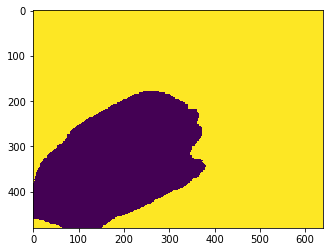

In [40]:
plt.imshow(mask[0][0].reshape([480,640]))

In [31]:
image.shape, mask.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
num = 0

In [ ]:
num += 1

In [ ]:
test_image = image[num]
test_image.shape
plt.imshow(test_image.astype('uint8'))

In [ ]:
test_mask = mask[num]
print(test_mask.reshape([480,640]).shape)
plt.imshow(test_mask.reshape([480,640]).astype('uint8'))